# Red Wine Quality Prediction Project

Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!



In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")


In [180]:
df=pd.read_csv("winequality_red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [181]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

In [182]:
df.tail(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310         0.41             2.4      0.065   
1587            5.8             0.610         0.11             1.8      0.066   
1588            7.2             0.660         0.33             2.5      0.068   
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1584                 24.0                  34.0  0.99484  3.29       0.80   
1585                 22.0                  48.0  0.99494  3.30       0.84   
1586                 34.0                  60.0  0.99492  3.34       0.85   
1587                 18.0                  28.0  0.99483  3.55       0.66   
1588                 34.0                 102.0  0.99414  3.27       0.78   
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1584     11.6        7  
1585     11.5        6  
1586     11.4        6  
1587     10.9        6  
1588     12.8        6  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [183]:
print("Columns :",df.columns) 
print("shape:", df.shape)
print("info:", df.info())
print("data types:", df.dtypes)    # for checking the datatypes of the columns


Columns : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               

In [184]:
# checking the null values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [185]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Observations:-
    1. standard deviation is too high in free sulphur dioxide and total sulfur dioxide columns. so spread will be high. outliers will be present.
    2. Mean > median so positive skewness will be there.
    3. gap between 75th percentile and max value is more. so outliers will be present

<Axes: >

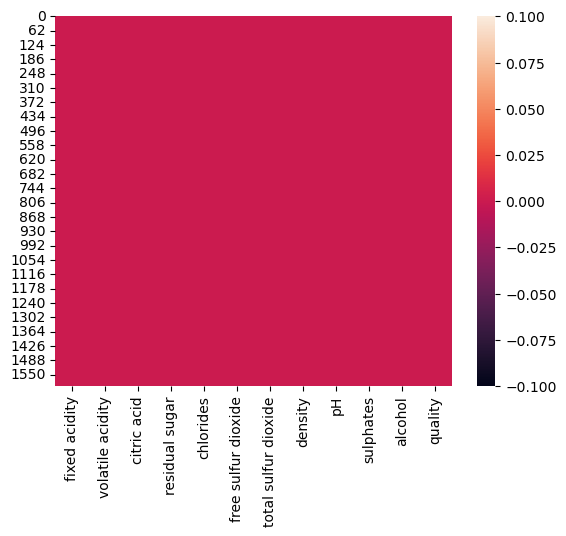

In [186]:
#Lets visualize it using the heatmap
sns.heatmap(df.isnull())

In [187]:
#checking the unique values in quality column
df["quality"].unique()


array([5, 6, 7, 4, 8, 3])

In [188]:
df["quality"].nunique()

6

In [189]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

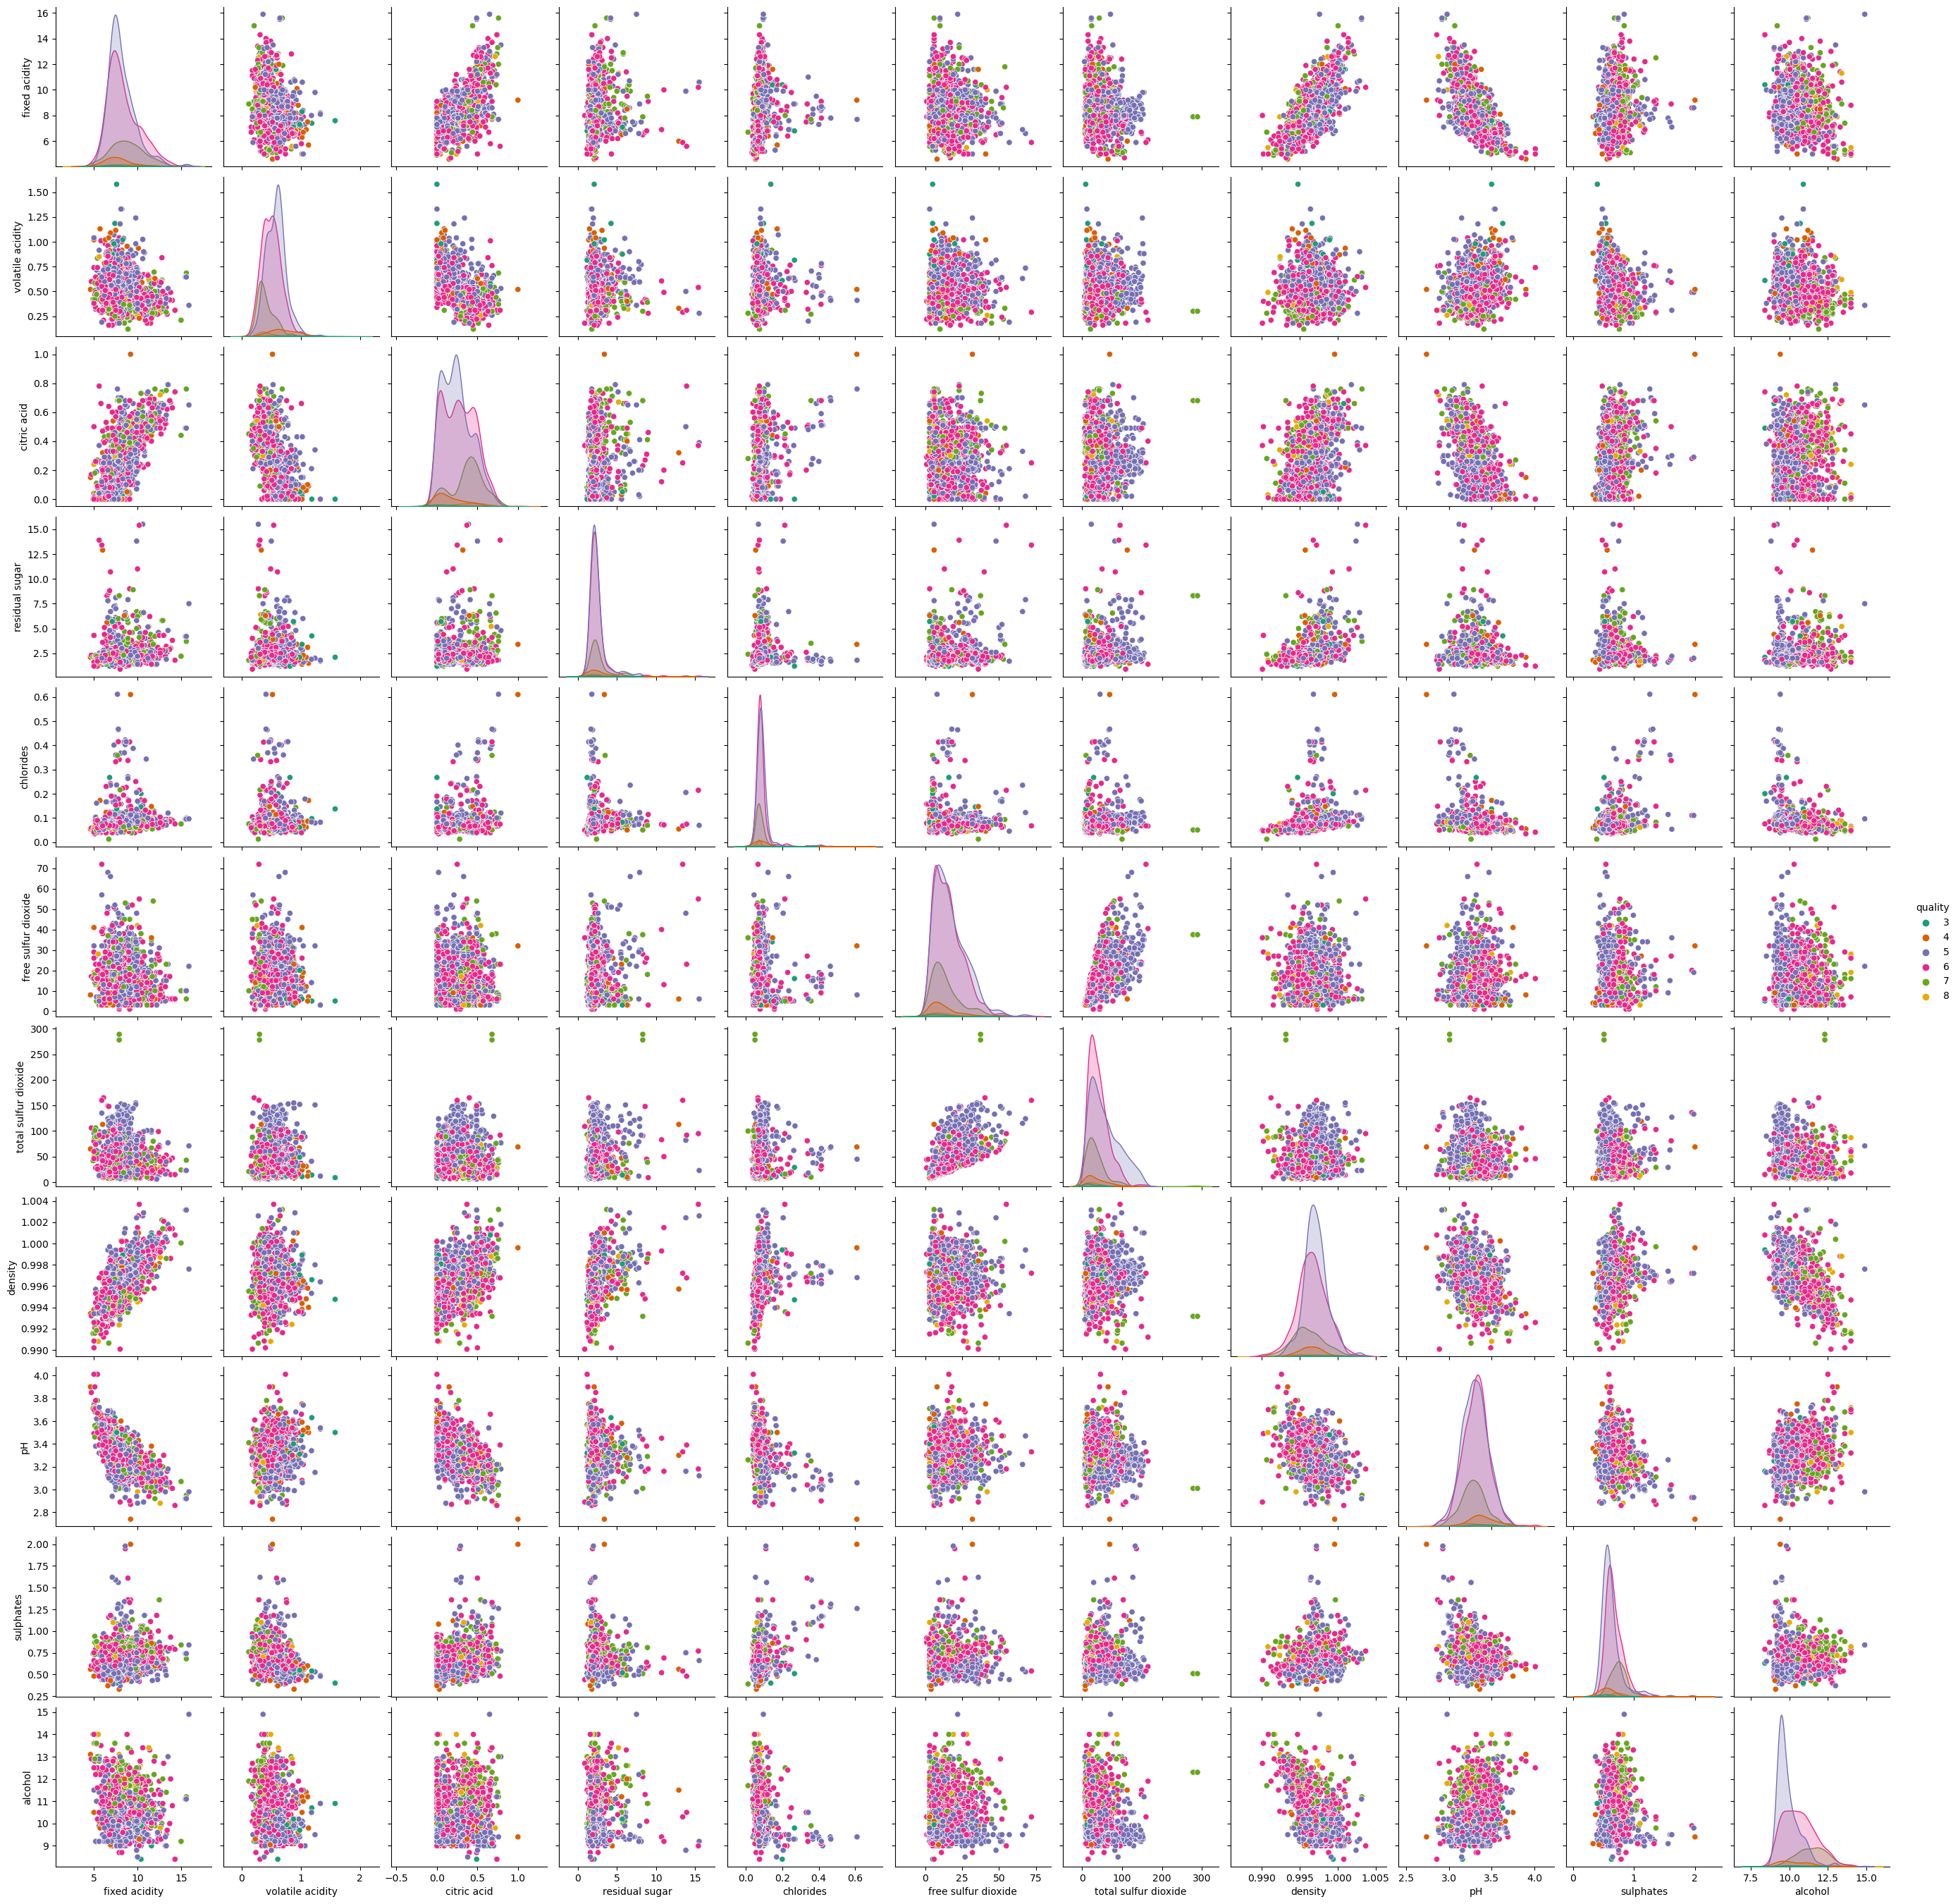

In [190]:
sns.pairplot(df, hue="quality",palette="Dark2")
plt.show()

1. pairplot givess the pairwise relation between the features on the basis of the target(quality). On diagonal, distribution plots are there.
2. Fixed Acidity, residual sugar, chlorides, total sulfur dioxide, sulphates, alcohol colum have the positive skewness.
3. There are outliers present in many columns. so lets check it by using boxplot.

In [191]:
dfcorr=df.corr()
dfcorr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

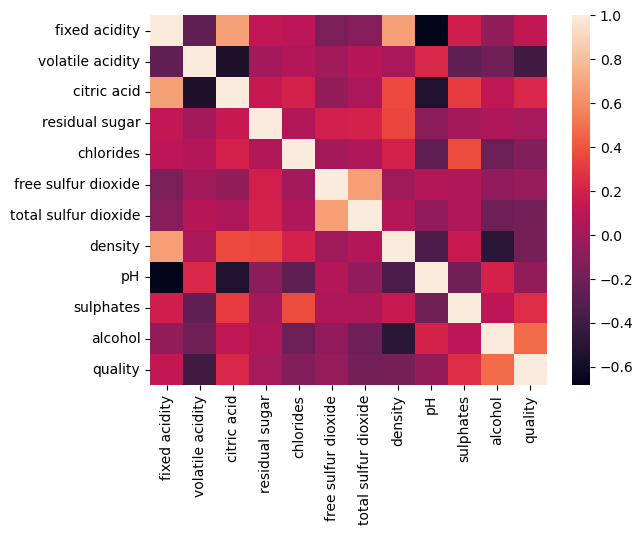

In [192]:
sns.heatmap(dfcorr)

<Axes: >

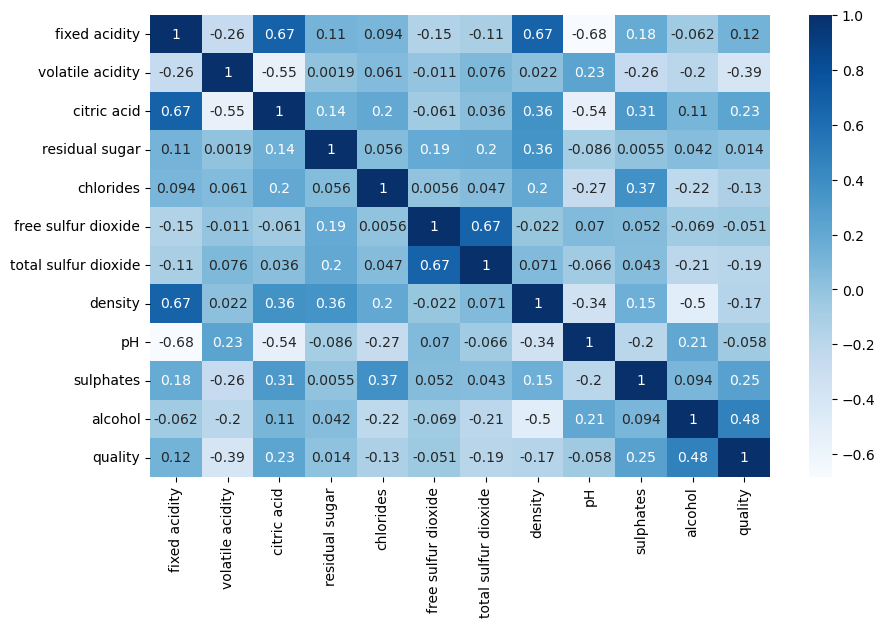

In [193]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr, cmap="Blues", annot=True)

observation:
    1. volatile acidity w.r.t. quality have largest negative value is -0.39. we can drop it.

In [194]:
corrmatrix=df.corr()
corrmatrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<Axes: xlabel='density', ylabel='Density'>

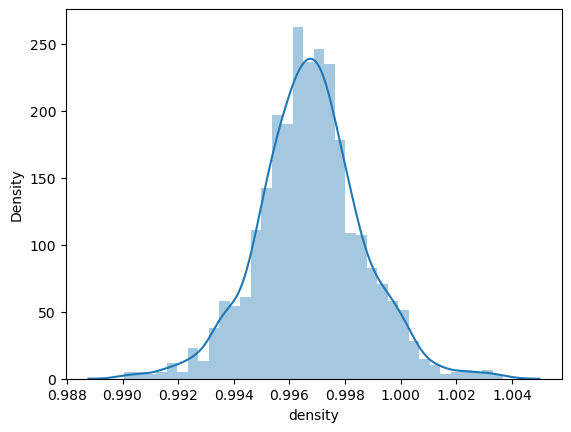

In [195]:
sns.distplot(df["density"])

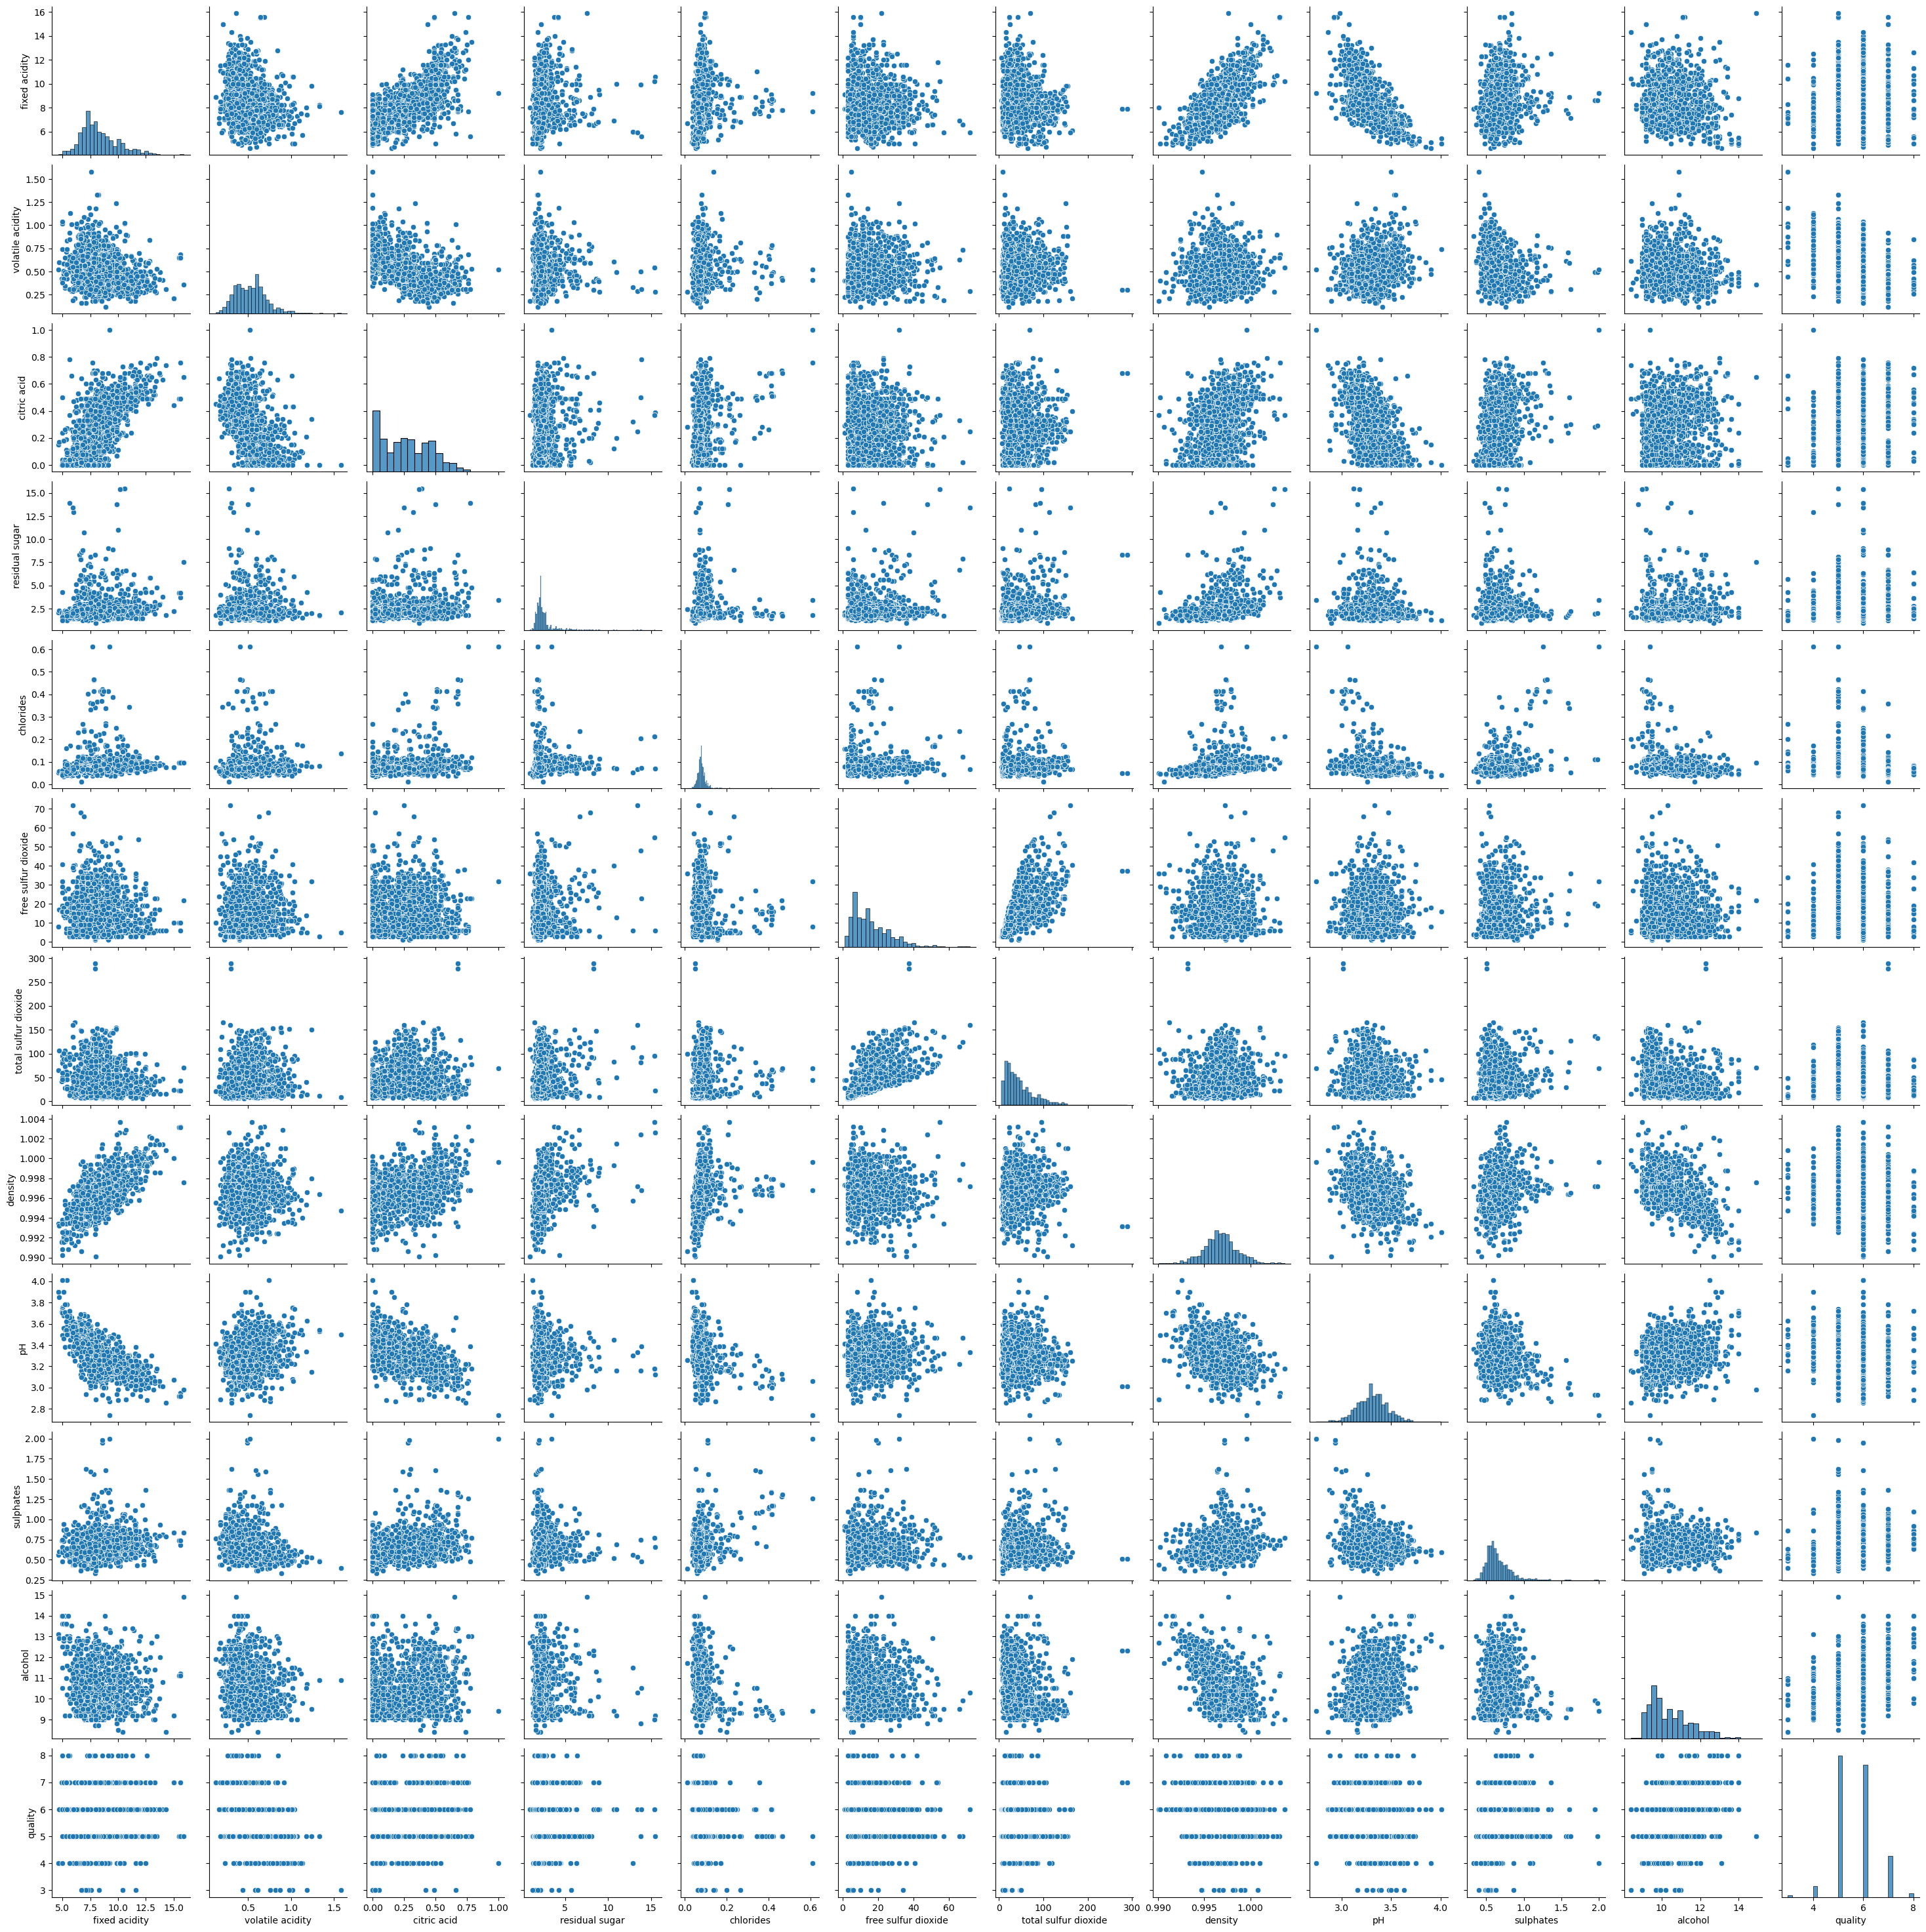

In [196]:
sns.pairplot(df)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

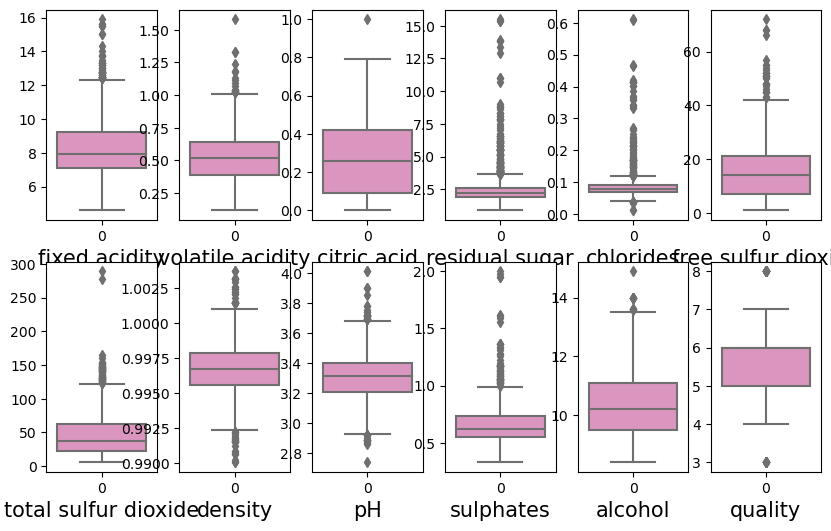

In [197]:
# checking the outliers by using boxplot
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for i in df.columns:
    if plotnumber<=12:
        a=plt.subplot(2,6,plotnumber)
        sns.boxplot(df[i], palette="Set2_r")
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout

In [198]:
# dropping the -ively correlated values
df.drop("volatile acidity",axis=1, inplace=True)

In [199]:
df.shape

(1599, 11)

In [200]:
#Splitting the independent and target variables in x and y
x=df.drop('quality',axis=1)
y=df['quality']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

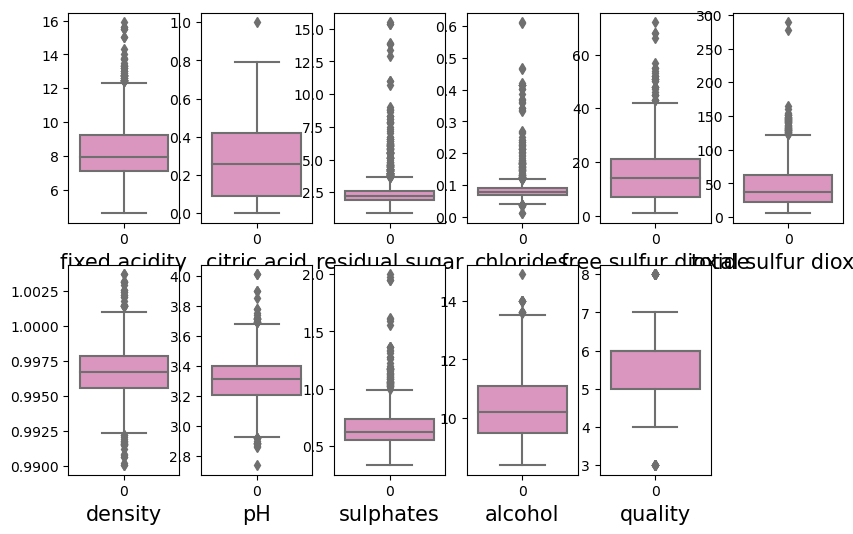

In [201]:

# again checking the outliers by using boxplot
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for i in df.columns:
    if plotnumber<=11:
        a=plt.subplot(2,6,plotnumber)
        sns.boxplot(df[i], palette="Set2_r")
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout

In [202]:
from scipy.stats import zscore

# removing the outliers
z=np.abs(zscore(df))
z

fixed acidity  citric acid  residual sugar  chlorides  \
0          0.528360     1.391472        0.453218   0.243707   
1          0.298547     1.391472        0.043416   0.223875   
2          0.298547     1.186070        0.169427   0.096353   
3          1.654856     1.484154        0.453218   0.264960   
4          0.528360     1.391472        0.453218   0.243707   
...             ...          ...             ...        ...   
1594       1.217796     0.980669        0.382271   0.053845   
1595       1.390155     0.877968        0.240375   0.541259   
1596       1.160343     0.723916        0.169427   0.243707   
1597       1.390155     0.775267        0.382271   0.264960   
1598       1.332702     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol   quality  
0      0.579207  0.960246  0.787823  
1      0.128950  0.584777  0.787823  
2      0.048089  0.584777  0.787823  
3      0.461180  0.584777  0.450848  
4      0.579207  0.960246  0.787823  
...         ...       ...       ...  
1594   0.461180  0.072294  0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990  0.209308  0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 11 columns]

In [203]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1458 rows x 11 columns]

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
citric acid             Axes(0.257857,0.53;0.110714x0.35)
residual sugar          Axes(0.390714,0.53;0.110714x0.35)
chlorides               Axes(0.523571,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.656429,0.53;0.110714x0.35)
total sulfur dioxide    Axes(0.789286,0.53;0.110714x0.35)
density                    Axes(0.125,0.11;0.110714x0.35)
pH                      Axes(0.257857,0.11;0.110714x0.35)
sulphates               Axes(0.390714,0.11;0.110714x0.35)
alcohol                 Axes(0.523571,0.11;0.110714x0.35)
quality                 Axes(0.656429,0.11;0.110714x0.35)
dtype: object

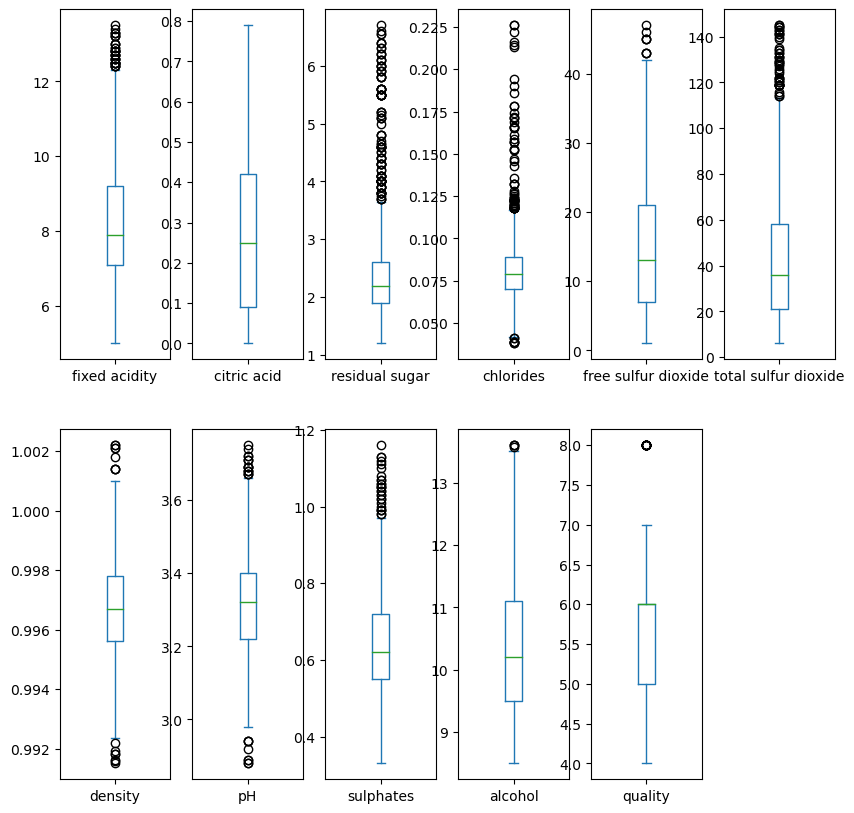

In [204]:
df_new.plot(kind='box',subplots=True, layout=(2,6), figsize=(10,10))

In [205]:
#%data loss calculation
loss_percent=(1599-1458)/1599*100
print(loss_percent)

8.818011257035648


In [206]:
# to check the distribution of skewness
x.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

There is skewness in dataset,so it needs to be removed using power transform

In [207]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

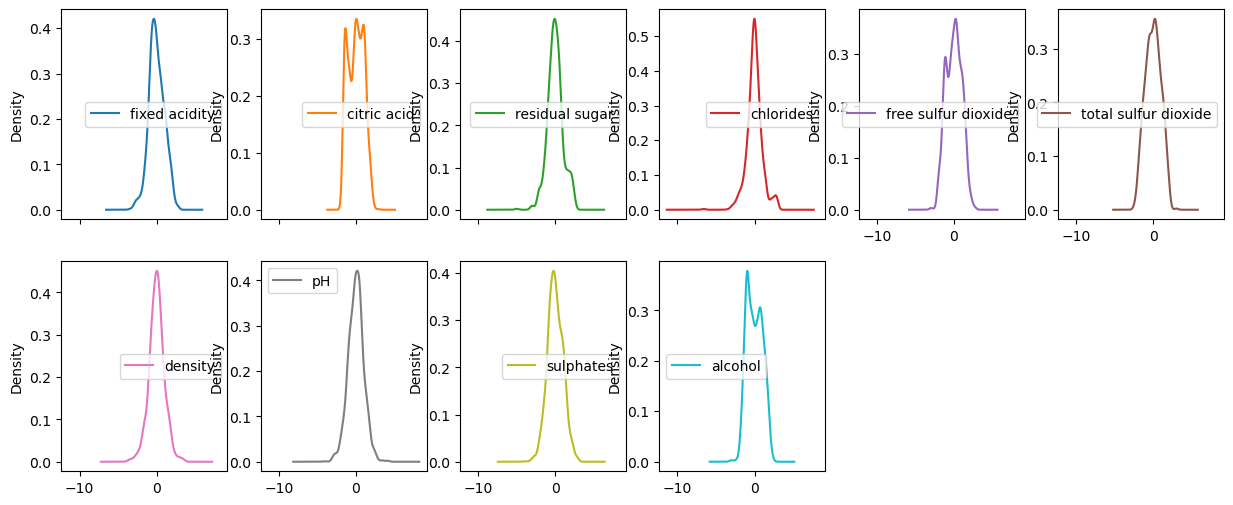

In [208]:
df_new.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

In [209]:
df_new.skew()

fixed acidity           0.002529
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002822
sulphates               0.009985
alcohol                 0.112372
dtype: float64

 you can see in the plots clearly that skewness is removed now.

In [210]:
x=df_new
x

fixed acidity  citric acid  residual sugar  chlorides  \
0         -0.442666    -1.531109       -0.597145  -0.172896   
1         -0.161308    -1.531109        0.556565   0.786204   
2         -0.161308    -1.255359        0.152372   0.560696   
3          1.522582     1.398471       -0.597145  -0.226113   
4         -0.442666    -1.531109       -0.597145  -0.172896   
...             ...          ...             ...        ...   
1594      -1.461202    -0.993315       -0.380998   0.480036   
1595      -1.767458    -0.867068       -0.008632  -1.013159   
1596      -1.364367    -0.683294        0.152372  -0.172896   
1597      -1.767458    -0.743826       -0.380998  -0.226113   
1598      -1.662640     1.031070        1.375435  -0.688299   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.268045             -0.124411  0.564442  1.275690   
1                0.993852              0.854954  0.036967 -0.709517   
2                0.193450              0.540394  0.142851 -0.310054   
3                0.385115              0.693699  0.669354 -0.980154   
4               -0.268045             -0.124411  0.564442  1.275690   
...                   ...                   ...       ...       ...   
1594             1.397043              0.244351 -0.978746  0.906172   
1595             1.727353              0.457504 -0.860223  1.336627   
1596             1.235044              0.107498 -0.527497  0.718869   
1597             1.397043              0.244351 -0.672160  1.638595   
1598             0.473632              0.177479 -0.661432  0.529832   

      sulphates   alcohol  
0     -0.581650 -1.075025  
1      0.395140 -0.500860  
2      0.183772 -0.500860  
3     -0.392318 -0.500860  
4     -0.581650 -1.075025  
...         ...       ...  
1594  -0.392318  0.292864  
1595   0.874884  0.888124  
1596   0.820841  0.734558  
1597   0.588344 -0.018800  
1598   0.256369  0.734558  

[1599 rows x 10 columns]

In [211]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [212]:
y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [213]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [214]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

Here we can see that the data is not balanced. since it is a classification problem, we will balace the data using the oversampling method.

In [215]:
# Oversampling or Resampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)


In [111]:
y1.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [234]:
#Model Building
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'at Random_state',maxRS)

Best accuracy is 0.927710843373494 at Random_state 323


In [235]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [236]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.880722891566265
[[346  58]
 [ 41 385]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       404
           1       0.87      0.90      0.89       426

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



In [237]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9265060240963855
[[374  30]
 [ 31 395]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       404
           1       0.93      0.93      0.93       426

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



In [238]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.944578313253012
[[376  28]
 [ 18 408]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       404
           1       0.94      0.96      0.95       426

    accuracy                           0.94       830
   macro avg       0.95      0.94      0.94       830
weighted avg       0.94      0.94      0.94       830



In [239]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8975903614457831
[[350  54]
 [ 31 395]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       404
           1       0.88      0.93      0.90       426

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830



In [240]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8397590361445784
[[333  71]
 [ 62 364]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       404
           1       0.84      0.85      0.85       426

    accuracy                           0.84       830
   macro avg       0.84      0.84      0.84       830
weighted avg       0.84      0.84      0.84       830



In [241]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8530120481927711
[[339  65]
 [ 57 369]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       404
           1       0.85      0.87      0.86       426

    accuracy                           0.85       830
   macro avg       0.85      0.85      0.85       830
weighted avg       0.85      0.85      0.85       830



In [242]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.9265060240963855
[[372  32]
 [ 29 397]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       404
           1       0.93      0.93      0.93       426

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



In [243]:
Etc=ExtraTreeClassifier()
Etc.fit(x_train,y_train)
predEtc=Etc.predict(x_test)
print(accuracy_score(y_test,predEtc))
print(confusion_matrix(y_test,predEtc))
print(classification_report(y_test,predEtc))

0.8939759036144578
[[348  56]
 [ 32 394]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       404
           1       0.88      0.92      0.90       426

    accuracy                           0.89       830
   macro avg       0.90      0.89      0.89       830
weighted avg       0.90      0.89      0.89       830



In [244]:
#checking the CV score for Support Vector Machine Classifier
scr=cross_val_score(svc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predsvc)-scr.mean())

[0.92224231 0.81012658 0.88969259 0.82097649 0.85144928]
0.8588974500091726
Difference between accuracy score and cross validation score is 0.02182544155709243


In [245]:
#checking the CV score for Decision Tree Classifier
scr=cross_val_score(dtc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, preddtc)-scr.mean())

[0.91139241 0.8318264  0.8716094  0.86256781 0.88224638]
0.8719284797022826
Difference between accuracy score and cross validation score is 0.054577544394102895


In [246]:
#checking the CV score for Random Forest Classifier
scr=cross_val_score(rfc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predrfc)-scr.mean())

[0.96383363 0.87522604 0.94213382 0.86618445 0.9076087 ]
0.9109973268338706
Difference between accuracy score and cross validation score is 0.03358098641914142


In [247]:
#checking the CV score for Gradient Boosting Classifier
scr=cross_val_score(gbc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predgbc)-scr.mean())

[0.90596745 0.82459313 0.90415913 0.7920434  0.85326087]
0.8560047959745264
Difference between accuracy score and cross validation score is 0.04158556547125669


In [248]:
#checking the CV score for Logistic Regression
scr=cross_val_score(LR,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predLR)-scr.mean())

[0.88065099 0.80108499 0.83905967 0.73598553 0.80434783]
0.8122258039154022
Difference between accuracy score and cross validation score is 0.02753323222917614


In [249]:
#checking the CV score for Ada Boost Classifier
scr=cross_val_score(abc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predabc)-scr.mean())

[0.86618445 0.79746835 0.84810127 0.76130199 0.80978261]
0.8165677333123673
Difference between accuracy score and cross validation score is 0.03644431488040378


In [250]:
#checking the CV score for Bagging Classifier
scr=cross_val_score(bc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predbc)-scr.mean())

[0.92405063 0.87341772 0.93128391 0.87884268 0.89311594]
0.9001421757475694
Difference between accuracy score and cross validation score is 0.02636384834881611


In [251]:
#checking the CV score for Extra Tree Classifier
scr=cross_val_score(Etc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predEtc)-scr.mean())

[0.9005425  0.83544304 0.8716094  0.80831826 0.81884058]
0.8469507560866945
Difference between accuracy score and cross validation score is 0.04702514752776332


Support Vector Machine Classifier is our best model as difference between accuracy score and cross validation score is least.

# Support Vector Machine Classifier is our best Model

Hyper Parameter Tuning

In [252]:
from sklearn.model_selection import GridSearchCV

In [253]:
#Creating parameters list to pass in GridSearchCV
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
GCV=GridSearchCV(svc,parameters)
GCV.fit(x_train,y_train)
print(GCV.best_params_)
print(GCV.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.9182967158024395


In [254]:
final_model= SVC(C=10, kernel='rbf')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

93.37349397590361


Plotting ROC and compare AUC for all the models used

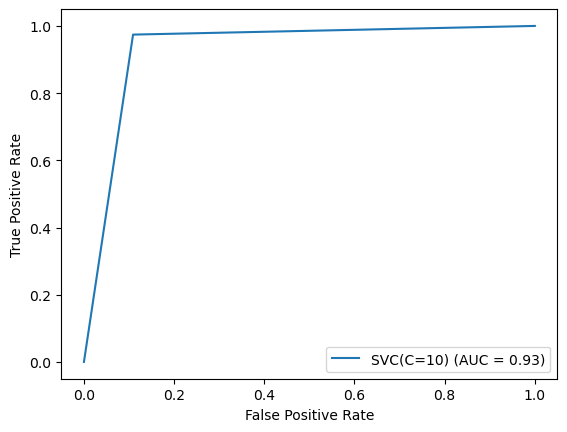

In [255]:
# plotting all the models used here

from sklearn import metrics

fpr,tpr,thresholds=metrics.roc_curve(y_test, pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()


In [256]:
#saving the model
import joblib
joblib.dump(final_model,'Red_Wine_quality_prediction.pkl')

['Red_Wine_quality_prediction.pkl']

In [172]:
#lets load the saved model and get the predictions
model= joblib.load('Red_Wine_quality_prediction.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [257]:
a=np.array(y_test)
df1=pd.DataFrame()
df1["predicted"]=prediction
df1["original"]=a
df1

predicted  original
0            0         0
1            0         0
2            1         1
3            1         1
4            0         1
..         ...       ...
825          0         1
826          0         1
827          1         1
828          1         0
829          1         1

[830 rows x 2 columns]

In [258]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [263]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [264]:
y.value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [265]:
print('Good Quality wine:',217)
print('Bad Quality wine:',1382)

Good Quality wine: 217
Bad Quality wine: 1382
